# Chapter 4: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
!wget https://nlp100.github.io/data/neko.txt -P ../data/

--2020-07-05 15:50:02--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘../data/neko.txt’

neko.txt            100%[===================>] 952.92K  1.09MB/s    in 0.9s    

2020-07-05 15:50:04 (1.09 MB/s) - ‘../data/neko.txt’ saved [975789/975789]



In [7]:
# !brew install mecab mecab-ipadic
# !git clone --depth 1 git@github.com:neologd/mecab-ipadic-neologd.git
# !cd mecab-ipadic-neologd
# !./bin/install-mecab-ipadic-neologd -n

In [2]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/local/lib/mecab/dic/mecab-ipadic-neologd


In [3]:
# !mecab ../data/neko.txt -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd -o ../data/neko.txt.mecab
!mecab ../data/neko.txt -o ../data/neko.txt.mecab

In [4]:
!head -20 ../data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
import re

class POS:
    def __init__(self, file):
        self._doc = []
        
        lines = []
        with open(file, "r") as f:
            for line in f.readlines():
                if not re.match("\n", line):
                    if re.match("EOS", line):
                        if lines:
                            self._doc.append(lines)
                            lines = []
                    else:
                        try:
                            surface, rest = line.split("\t")
                        except Exception as e:
                            print(e)
                        
                        if len(rest.split(",")) == 9:
                            pos, pos1, _, _, _, _, base, _, _ = rest.split(",")
                        else:
                            pos, pos1, _, _, _, _, base = rest.split(",")

                        dic = {
                                "surface": surface.strip(),
                                "base": base.strip(),
                                "pos": pos.strip(),
                                "pos1": pos1.strip()
                            }

                        lines.append(dic)
        
    def head(self, n=10):
        print(self._doc[:n])
        
    def doc(self):
        return self._doc

In [2]:
pos = POS("../data/neko.txt.mecab")

## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [3]:
v_surface = []
for i in pos.doc():
    for j in i:
        if j["pos"] == "動詞":
            v_surface.append(j["surface"])
            
print(" ".join(v_surface[:10]))

生れ つか し 泣い し いる 始め 見 聞く 捕え


## 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [4]:
v_base = []
for i in pos.doc():
    for j in i:
        if j["pos"] == "動詞":
            v_base.append(j["base"])
            
print(" ".join(v_base[:10]))

生れる つく する 泣く する いる 始める 見る 聞く 捕える


## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
no = []
for p in pos.doc():
    for i, j in enumerate(p):
        if j["surface"] == "の":
            try:
                prev = p[i-1]
                nex = p[i+1]
            except Exception as e:
                print(e)
                continue
            
            if prev["pos"] == "名詞" and nex["pos"] == "名詞":
                no.append(prev["surface"] + j["surface"] + nex["surface"])
                
print(" ".join(no[:10]))

彼の掌 掌の上 書生の顔 はずの顔 顔の真中 穴の中 書生の掌 掌の裏 何の事 肝心の母親


## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [23]:
nouns = []

for p in pos.doc():
    noun = []
    is_noun = False
    for j in p:
        if j["pos"] == "名詞":
            if not is_noun:
                noun.append(j["surface"])
                is_noun = True
            else:
                noun.append(j["surface"])
        else:
            if not is_noun:
                continue
            else:
                if len(noun) > 1:
                    nouns.append("".join(noun))
                    
                is_noun = False
                noun = []

        
print(" ".join(nouns[:200]))

人間中 一番獰悪 時妙 一毛 その後猫 一度 ぷうぷうと煙 邸内 三毛 書生以外 四五遍 この間おさん 三馬 御台所 まま奥 住家 終日書斎 勉強家 勉強家 勤勉家 二三ページ 主人以外 限り吾輩 朝主人 一番心持 二人 一つ床 一人 最後大変 ——猫 神経胃弱性 物指 尻ぺたをひどく 言語同断 家内総がかり 筋向 白君 度毎 白君 先日玉 四疋 三日目 四疋 白君 我等猫族 家族的生活 三毛君 所有権 我々同族間 目刺 一番先 彼等人間 我等 吾人 白君 三毛君 間違いだらけ 後架先生 宗盛 宗盛 月給日 水彩絵具 毎日毎日書斎 人の 自ら筆 眼鏡越 一室内 以太利 大家アンドレア・デル・サルト 露華 寒鴉 これ一幅 活画 翌日吾輩 一分 辛棒 今吾輩 今吾輩 波斯産 上不思議 盲猫 心中ひそか いくらアンドレア・デル・サルト 一分 あと大 壊わし 馬鹿野郎 馬鹿野郎 辛棒 馬鹿野郎呼わり 平生吾輩 馬鹿野郎 みんな増長 先どこ 数倍 十坪 腹加減 穏かな日 二時頃 昼飯後 運動かたがた 一本一本 杉垣 前後不覚 庭内 忍び入り 黒猫 柔毛 出ずるよう 猫中 杉垣 二三枚 ぐべき力 険呑 時吾輩 言葉付 誰だい 乱暴猫 同盟敬遠主義 一体車屋 大分強そう おれなんざ 茶畠 箆棒め あらら その後吾輩 車屋相当 不徳事件 日例 茶畠 何匹 近付 事彼 手柄話 欠所 三四十 二百 一人 何鼠 こん畜生 泥溝 奴め最後っ屁 二三遍 百年目 考げ ——一 五銭 壱円五十銭 胡魔化 鼠以外 水彩画 十二月一日 大分放蕩 元来放蕩家 放蕩家 水彩画 料理屋 水彩画家 水彩画 通人論 水彩画 批評眼 二日 十二月四日 水彩画 通り下手 水彩画 水彩画家 所謂通人 水彩画 翌日例 金縁眼鏡 美学者 結果今日 美学者 美学者 アンドレア・デル・サルト事件 情線 滑稽的美感 仏国革命史 日本文学会 演説会 傍聴者 百名 皆熱心 文学者 歴史小説セオファーノ 歴史小説 女主人公 鬼気人 僕同様 神経胃弱性 差支 ただ化 美学者 時ゃ別 けらけら 美学者 美学者 模様画


## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
words = []

for p in pos.doc():
    for j in p:
        if j["pos"] not in ["記号", "助詞", "助動詞"]:
            if j["base"] not in ["する", "いる", "なる", "てる", "れる", "ある", "こと", "もの", "の", "ん", "ない", "この", "その", "よう"]:
                if j["base"] == "*":
                    words.append(j["surface"])
                else:
                    words.append(j["base"])

In [11]:
from collections import Counter

counter = Counter(words)
print(counter.most_common()[:50])

[('云う', 1408), ('事', 1207), ('君', 973), ('主人', 932), ('見る', 675), ('御', 636), ('人', 602), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('吾輩', 481), ('来る', 460), ('これ', 414), ('それ', 381), ('聞く', 347), ('時', 345), ('迷亭', 343), ('行く', 340), ('出来る', 324), ('三', 319), ('——', 319), ('出る', 317), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('僕', 268), ('さん', 260), ('気', 250), ('猫', 248), ('また', 238), ('中', 234), ('十', 231), ('出す', 227), ('どう', 220), ('知る', 217), ('細君', 213), ('見える', 207), ('鼻', 199), ('今', 195), ('大', 195), ('者', 194), ('そんな', 194)]


## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

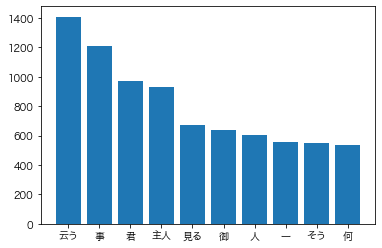

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.family'] = 'Hiragino Sans'

top = counter.most_common(10)
keys = [x[0] for x in top]
values = [x[1] for x in top]

plt.bar(keys, values)

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [14]:
neko = []

for p in pos.doc():
    for j in p:
        if j["base"] == "猫":
            neko.append(p)

In [15]:
co = []

for p in neko:
    for j in p:
        if j["pos"] not in ["記号", "助詞", "助動詞"]:
            if j["base"] not in ["する", "いる", "なる", "てる", "れる", "ある", "こと", "もの", "の", "ん", "ない", "この", "その", "よう", "猫"]:
                if j["base"] == "*":
                    co.append(j["surface"])
                else:
                    co.append(j["base"])

<BarContainer object of 10 artists>

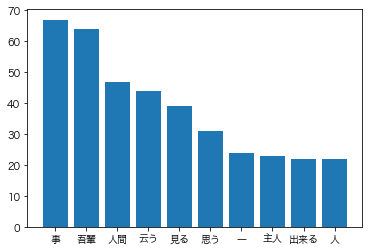

In [16]:
neko_counter = Counter(co)

top = neko_counter.most_common(10)
keys = [x[0] for x in top]
values = [x[1] for x in top]

plt.bar(keys, values)

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([1.1732e+04, 4.3000e+01, 1.7000e+01, 6.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.4170e+02, 2.8240e+02, 4.2310e+02, 5.6380e+02,
        7.0450e+02, 8.4520e+02, 9.8590e+02, 1.1266e+03, 1.2673e+03,
        1.4080e+03]),
 <a list of 10 Patch objects>)

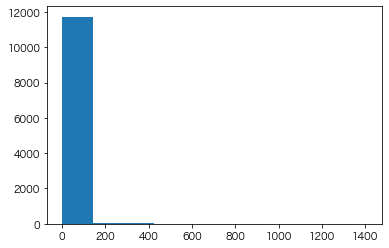

In [66]:
plt.hist(counter.values(), range=(1, counter.most_common()[0][1]))

(array([7173., 1613.,  811.,  459.,  286.,  240.,  178.,  127.,  105.,
          88.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

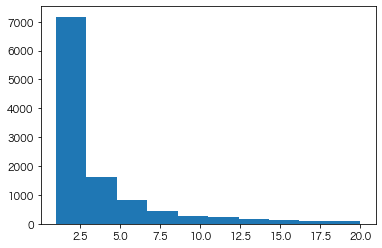

In [73]:
plt.hist(counter.values(), range=(1, 20))

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [71]:
l = [x[1] for x in counter.most_common()]

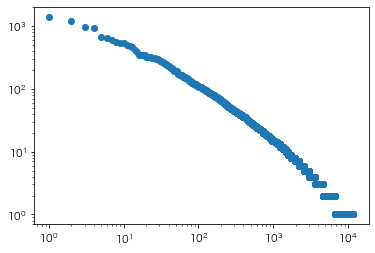

In [72]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(x=range(1, len(l) + 1), y=l)